Super conductivity set

Data Source
https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#

https://supercon.nims.go.jp/index_en.html

https://www.kaggle.com/apapiu/regularized-linear-models
    
    The original research on this:
        https://www.sciencedirect.com/science/article/pii/S0927025618304877?via%3Dihub
        
        
The statistical model gives reasonable out-of-sample predictions: ±9.5 K based on root-mean-squared-error. Features extracted based on thermal conductivity, atomic radius, valence, electron affinity, and atomic mass contribute the most to the model’s predictive accuracy


This helps:

    https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
    
    
    #https://stats.stackexchange.com/questions/234668/how-should-i-deal-with-highly-correlated-features

In [2]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('train.csv')
other = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)
df = pd.concat([df1,other],axis=1)
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']
print(df.shape)
df.head()

(21263, 168)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0



Note: The column 'number_of_elements' contains a compression of all information in the columns of `unique_m.csv`

In [8]:
import matplotlib.pyplot as plt

corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna()
corr = corr.reset_index().rename(columns={'index:':'feature'}).loc[1:]
corr

,index,critical_temp
1,wtd_std_ThermalConductivity,0.721271
2,range_ThermalConductivity,0.687654
3,range_atomic_radius,0.653759
4,std_ThermalConductivity,0.653632
5,wtd_mean_Valence,-0.632401
6,wtd_entropy_atomic_mass,0.626930
7,wtd_gmean_Valence,-0.615653
8,wtd_entropy_atomic_radius,0.603494
9,number_of_elements,0.601069
10,range_fie,0.600790


In [40]:
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna()
corr.hist()
plt.show()

,critical_temp,abs
number_of_elements,0.601069,0.601069
mean_atomic_mass,-0.113523,0.113523
wtd_mean_atomic_mass,-0.312272,0.312272
gmean_atomic_mass,-0.230345,0.230345
wtd_gmean_atomic_mass,-0.369858,0.369858
entropy_atomic_mass,0.543619,0.543619
wtd_entropy_atomic_mass,0.626930,0.626930
range_atomic_mass,0.491970,0.491970
wtd_range_atomic_mass,-0.337131,0.337131
std_atomic_mass,0.378766,0.378766


In [33]:
thresholds  =[0.2,0.3,0.4,0.5,0.6]
for t in thresholds:
    print(t,len(corr[np.abs(corr['critical_temp'])>t]))

0.2 74
0.3 61
0.4 39
0.5 29
0.6 12


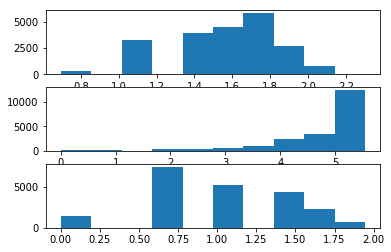

In [4]:
import matplotlib.pyplot as plt
floats = [i for i in X.columns if X[i].dtypes!=int]
ints = [i for i in X.columns if X[i].dtypes==int]

import numpy as np
#https://www.kaggle.com/apapiu/regularized-linear-models
for index,i in enumerate(ints):
    plt.subplot(3,1,index+1)
    plt.hist(np.log(X[i]+1))
plt.show()

In [31]:
corr.dropna()

,critical_temp
critical_temp,1.000000
wtd_std_ThermalConductivity,0.721271
range_ThermalConductivity,0.687654
range_atomic_radius,0.653759
std_ThermalConductivity,0.653632
wtd_mean_Valence,-0.632401
wtd_entropy_atomic_mass,0.626930
wtd_gmean_Valence,-0.615653
wtd_entropy_atomic_radius,0.603494
number_of_elements,0.601069


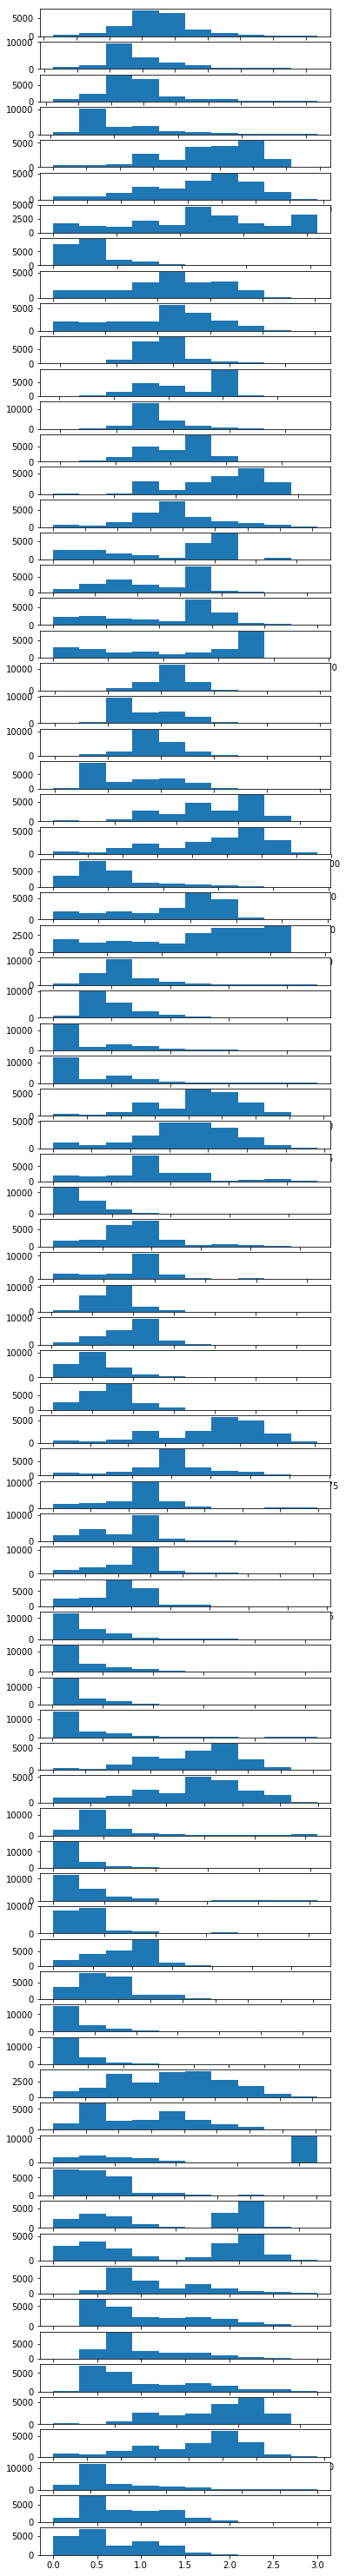

In [47]:
for index,f in enumerate(floats):
    plt.subplot(len(floats),1,index+1)
    plt.hist(X[f])
    plt.subplots_adjust(top=10.3)
plt.show()

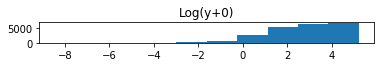

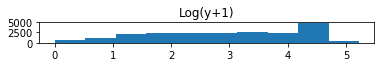

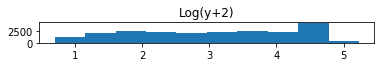

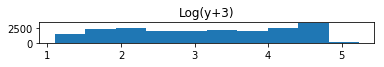

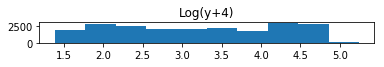

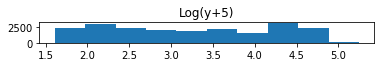

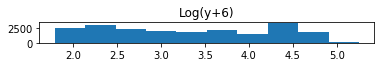

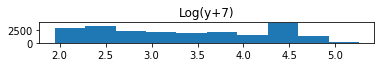

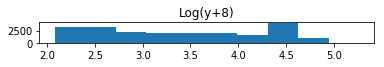

In [25]:
M = 9
for i in range(0,M):
    plt.subplot(M,1,i+1)
    plt.hist(np.log(y+i))
    plt.title('Log(y+'+str(i)+')')
    plt.show()

In [78]:
X[floats].corr()

def get_highly_correlated(data,threshold):
    highly_correlated = []
    for index1,c in enumerate(data.columns):
        for index2,j in enumerate(data.index):
            if index1>index2:
                if np.abs(data.iloc[index1,index2])>threshold:
                    highly_correlated.append((c,j))
    return set([tuple(sorted(i)) for i in highly_correlated])

get_highly_correlated(X[floats].corr(),0.6)

{('entropy_Density', 'entropy_ElectronAffinity'),
 ('entropy_Density', 'entropy_FusionHeat'),
 ('entropy_Density', 'entropy_Valence'),
 ('entropy_Density', 'entropy_atomic_mass'),
 ('entropy_Density', 'entropy_atomic_radius'),
 ('entropy_Density', 'entropy_fie'),
 ('entropy_Density', 'wtd_entropy_Density'),
 ('entropy_Density', 'wtd_entropy_FusionHeat'),
 ('entropy_Density', 'wtd_entropy_Valence'),
 ('entropy_Density', 'wtd_entropy_atomic_mass'),
 ('entropy_Density', 'wtd_entropy_atomic_radius'),
 ('entropy_Density', 'wtd_entropy_fie'),
 ('entropy_ElectronAffinity', 'entropy_FusionHeat'),
 ('entropy_ElectronAffinity', 'entropy_Valence'),
 ('entropy_ElectronAffinity', 'entropy_atomic_mass'),
 ('entropy_ElectronAffinity', 'entropy_atomic_radius'),
 ('entropy_ElectronAffinity', 'entropy_fie'),
 ('entropy_ElectronAffinity', 'range_ThermalConductivity'),
 ('entropy_ElectronAffinity', 'range_atomic_mass'),
 ('entropy_ElectronAffinity', 'range_fie'),
 ('entropy_ElectronAffinity', 'std_atomic_

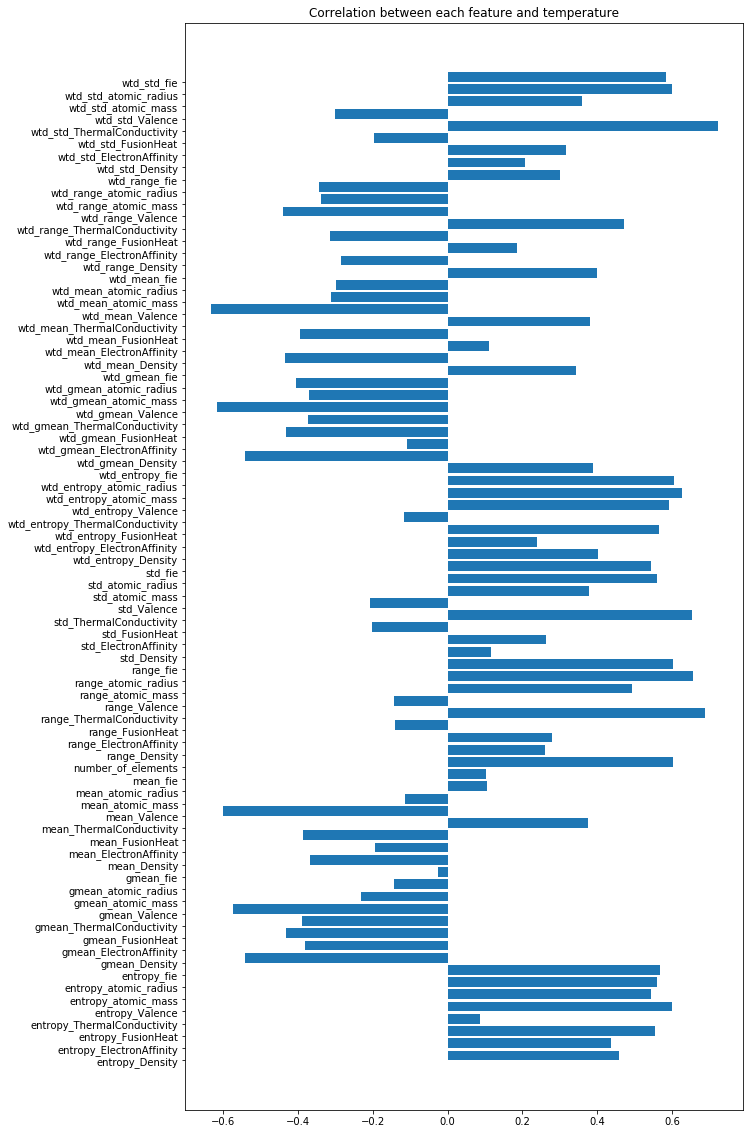

In [12]:
import numpy as np
import matplotlib.pyplot as plt
correlation = {}
for x in X.columns:
    correlation[x] = np.corrcoef(X[x],y)[0,1]
correlations = pd.DataFrame.from_dict(correlation,orient='index').reset_index()
correlations.rename(columns={'index':'Name',0:'Correlation coefficient'},inplace=True)
plt.figure(figsize=(10,20))
plt.barh(correlations['Name'],correlations['Correlation coefficient'],align='edge')
plt.title('Correlation between each feature and temperature')
plt.show()

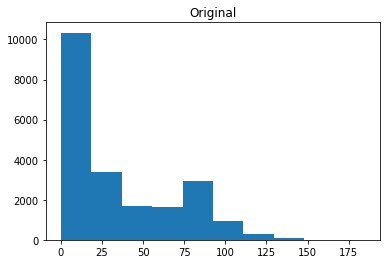

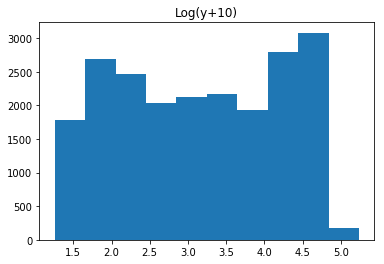

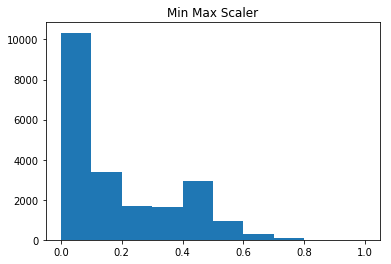

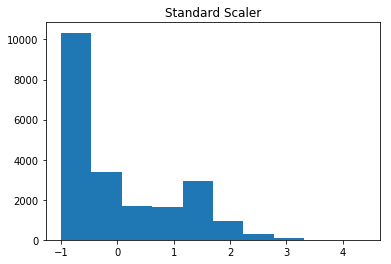

In [20]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler


MM = MinMaxScaler()
SS = StandardScaler()
n = Normalizer()

def Normalize(series):
    mean = np.mean(series)
    std = np.std(series)
    return (series - mean)/std

def MinMax(series):
    MAX = max(series)
    MIN = min(series)
    return (series - MIN)/(MAX-MIN)
    

plt.hist(y)
plt.title('Original')
plt.show()
plt.hist(np.log(y+3.51))
plt.title('Log(y+10)')
plt.show()
plt.hist(MinMax(y))
plt.title("Min Max Scaler")
plt.show()
plt.hist(Normalize(y))
plt.title("Standard Scaler")
plt.show()

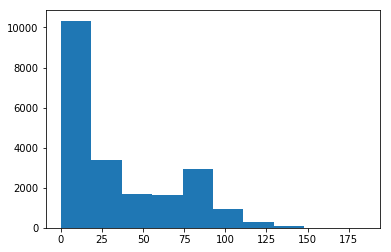

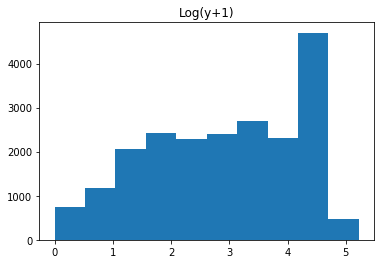

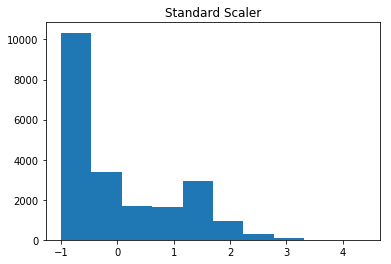

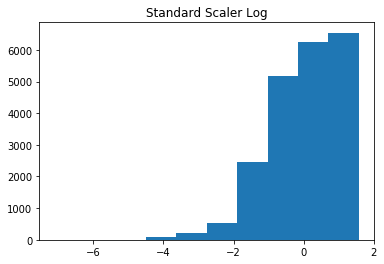

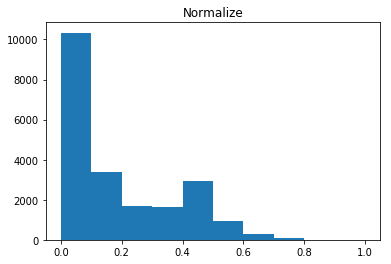

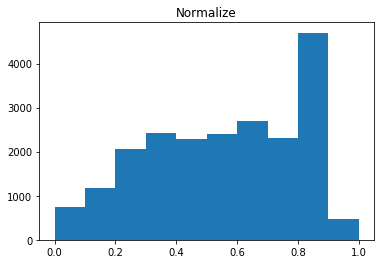

In [54]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler

def SS(y):
    y_mean = np.mean(y)
    y_std = np.std(y)
    return (y-y_mean)/y_std

def MinMax(y):
    y_min = min(y)
    y_max = max(y)
    return (y-y_min)/(y_max-y_min)
    

plt.hist(y)
plt.show()
plt.hist(np.log(y+1))
plt.title('Log(y+1)')
plt.show()
plt.hist(SS(y))
plt.title("Standard Scaler")
plt.show()
plt.hist(SS(np.log(y)+1))
plt.title("Standard Scaler Log")
plt.show()
plt.hist(MinMax(y))
plt.title("Normalize")
plt.show()
plt.hist(MinMax(np.log(y+1)))
plt.title("Normalize")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[29.   26.   19.   ...  1.98  1.84 12.8 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# of Features Highly correlated greater than: |+-0.5| with Temp:  25


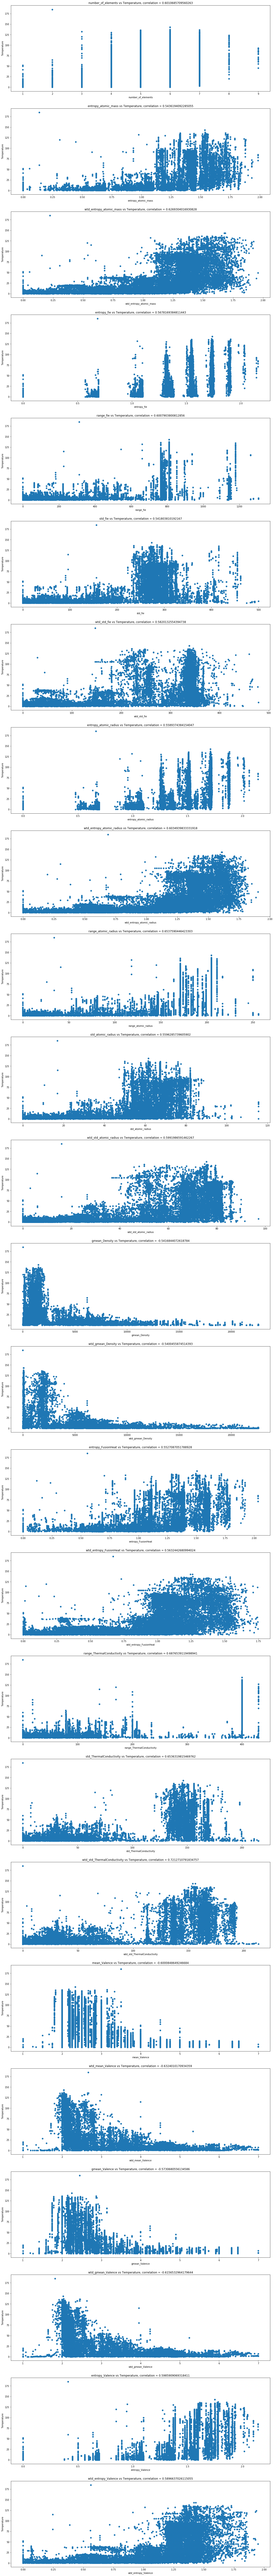

In [26]:
threshold = 0.5
highly_correlated = []
plt.figure(figsize=(20,10))
for index,x in enumerate(X.columns):
    correlation = np.corrcoef(X[x],y)[0,1]
    if np.abs(correlation)>threshold:
        highly_correlated.append(x)
    else:
        pass
    
print('# of Features Highly correlated greater than: |+-'+str(threshold)+'| with Temp: ',len(highly_correlated))
for index,x in enumerate(highly_correlated):
    plt.subplot(len(X.columns),1,index+1)
    plt.scatter(X[x],y)
    correlation = np.corrcoef(X[x],y)[0,1]
    plt.title(str(x)+' vs Temperature, correlation = '+str(correlation))
    plt.ylabel('Temperature')
    plt.xlabel(str(x))
    plt.subplots_adjust(top=50)
plt.show()

In [27]:
corr = df[highly_correlated].corr()
corr.style.background_gradient()

,number_of_elements,entropy_atomic_mass,wtd_entropy_atomic_mass,entropy_fie,range_fie,std_fie,wtd_std_fie,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,gmean_Density,wtd_gmean_Density,entropy_FusionHeat,wtd_entropy_FusionHeat,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence
number_of_elements,1,0.939304,0.881845,0.973195,0.781227,0.674005,0.717831,0.972245,0.904121,0.76806,0.62481,0.695089,-0.630504,-0.649882,0.900759,0.860479,0.69606,0.602018,0.66558,-0.609412,-0.648551,-0.618512,-0.659268,0.967832,0.892559
entropy_atomic_mass,0.939304,1,0.889709,0.964695,0.703397,0.60095,0.660164,0.972329,0.880213,0.708109,0.566698,0.647365,-0.546342,-0.574118,0.928251,0.845089,0.678341,0.597723,0.650085,-0.551641,-0.586855,-0.554477,-0.592817,0.963621,0.861479
wtd_entropy_atomic_mass,0.881845,0.889709,1,0.891982,0.744625,0.661304,0.73125,0.890615,0.961464,0.774054,0.660625,0.737633,-0.596833,-0.655734,0.835019,0.873931,0.688968,0.618855,0.684497,-0.583784,-0.644336,-0.586226,-0.650247,0.897636,0.918284
entropy_fie,0.973195,0.964695,0.891982,1,0.767796,0.672087,0.708893,0.997739,0.920192,0.773937,0.648793,0.710635,-0.624222,-0.643319,0.916592,0.864214,0.683849,0.602524,0.650649,-0.596644,-0.624606,-0.608303,-0.637874,0.992726,0.907923
range_fie,0.781227,0.703397,0.744625,0.767796,1,0.981628,0.940281,0.740917,0.797663,0.908734,0.86462,0.871711,-0.815491,-0.802732,0.593817,0.657066,0.683591,0.642073,0.670738,-0.740985,-0.731329,-0.757749,-0.746731,0.782544,0.771949
std_fie,0.674005,0.60095,0.661304,0.672087,0.981628,1,0.934255,0.640613,0.720724,0.882073,0.876079,0.859059,-0.808759,-0.788032,0.474265,0.557049,0.635063,0.610638,0.62365,-0.721737,-0.696705,-0.740587,-0.71324,0.689995,0.68992
wtd_std_fie,0.717831,0.660164,0.73125,0.708893,0.940281,0.934255,1,0.685378,0.781457,0.887192,0.844422,0.922258,-0.795222,-0.825228,0.57469,0.653455,0.740069,0.707854,0.709665,-0.728561,-0.754516,-0.730065,-0.760538,0.736856,0.724825
entropy_atomic_radius,0.972245,0.972329,0.890615,0.997739,0.740917,0.640613,0.685378,1,0.914223,0.744782,0.610407,0.679566,-0.594851,-0.616824,0.930294,0.867423,0.67901,0.595524,0.644207,-0.579872,-0.610735,-0.590868,-0.623531,0.989546,0.89893
wtd_entropy_atomic_radius,0.904121,0.880213,0.961464,0.920192,0.797663,0.720724,0.781457,0.914223,1,0.812398,0.709369,0.781488,-0.654177,-0.68789,0.84112,0.90786,0.690578,0.621078,0.675969,-0.623502,-0.660216,-0.635244,-0.677313,0.919184,0.951463
range_atomic_radius,0.76806,0.708109,0.774054,0.773937,0.908734,0.882073,0.887192,0.744782,0.812398,1,0.967428,0.958004,-0.815835,-0.817334,0.639652,0.666575,0.736137,0.697465,0.736142,-0.759162,-0.756621,-0.76186,-0.761772,0.796085,0.768452
